In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dfTrain = pd.read_csv('../data/TRAIN_TEST_corrected2/train_corrected2.csv').sample(frac=0.50)
train = dfTrain.drop(['price_usd', 'id'], axis=1)
target = dfTrain.price_usd

In [3]:
# DATA SCALING

scaler = StandardScaler().fit(train)
train = pd.DataFrame(scaler.transform(train), columns=train.columns)
train.head(3)

,year_created,month_created,day_created,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store
0,2.335400,-0.076012,-0.843601,-0.259841,-0.255878,0.189288,-0.239806,2.390721,-0.253308,0.852357,-0.726449,-0.123687
1,0.657205,-1.009185,1.373529,-0.250645,-0.247084,0.177771,-0.209486,-0.345326,-0.253308,-1.173218,1.376558,-0.123687
2,-0.181893,-1.009185,0.819246,1.397596,1.432420,-1.385145,0.982302,-0.345326,-0.253308,0.852357,-0.726449,-0.123687


In [4]:
# PARAMETROS PARA SVM
param_grid = [
                {'C': [0.25, 0.50, 1, 10, 100, 200],
                 'epsilon' : [0.0, 0.1, 0.3, 0.5, 0.6] } ]

# MEDIDA DE SCORE PARA CROSS-VALIDATION
scoring = {'MSE': 'neg_mean_squared_error'}

svr = LinearSVR(max_iter=500)
gs = GridSearchCV(svr, scoring=scoring, param_grid=param_grid, cv=10, refit='MSE', return_train_score=False)

In [5]:
# COMIENZO EL GRID SEARCH
gs.fit(train, target);

In [6]:
results = gs.cv_results_
dfResults = pd.DataFrame(results).loc[:, ('rank_test_MSE', 'mean_test_MSE', 
                                          'param_C', 'param_epsilon')].infer_objects()

In [7]:
dfResults.sort_values(by='rank_test_MSE')

,rank_test_MSE,mean_test_MSE,param_C,param_epsilon
20,1,-8.639318e+10,100.00,0.0
24,2,-8.639580e+10,100.00,0.6
21,3,-8.640530e+10,100.00,0.1
29,4,-8.640612e+10,200.00,0.6
23,5,-8.640678e+10,100.00,0.5
27,6,-8.640904e+10,200.00,0.3
25,7,-8.641139e+10,200.00,0.0
22,8,-8.641415e+10,100.00,0.3
28,9,-8.641484e+10,200.00,0.5
26,10,-8.642125e+10,200.00,0.1


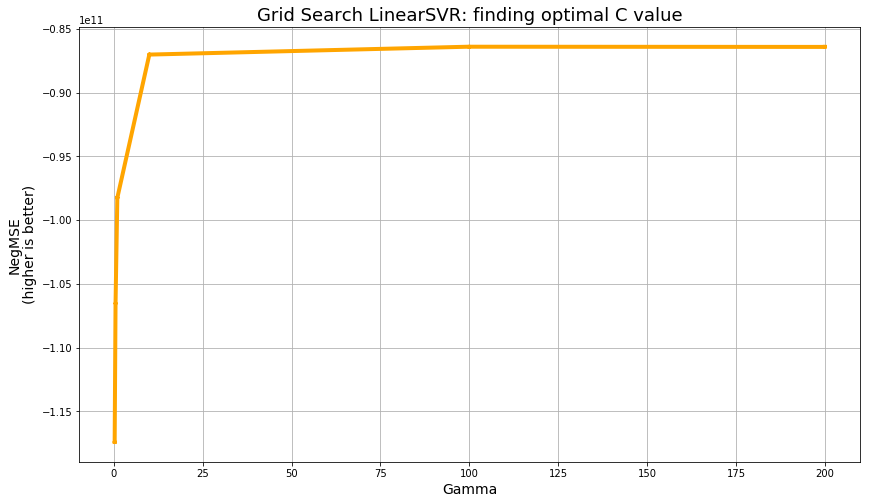

In [12]:
ax = dfResults.plot(x='param_C', y='mean_test_MSE', 
                    figsize=(14, 8), lw=4, 
                    legend=False, color='orange')
ax.grid()
ax.set_title("Grid Search LinearSVR: finding optimal C value", fontsize=18)
ax.set_xlabel('Gamma', fontsize=14)
ax.set_ylabel('NegMSE\n(higher is better)', fontsize=14)

In [ ]:
print "\nMejores parametros:", gs.best_params_
print "Tuvieron un error de:", repr(-gs.best_score_), "midiendo como MSE"